In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv("customer_support_tickets.csv")

In [51]:
data

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [52]:
data["Product Purchased"].unique()

array(['GoPro Hero', 'LG Smart TV', 'Dell XPS', 'Microsoft Office',
       'Autodesk AutoCAD', 'Microsoft Surface', 'Philips Hue Lights',
       'Fitbit Versa Smartwatch', 'Dyson Vacuum Cleaner',
       'Nintendo Switch', 'Microsoft Xbox Controller',
       'Nintendo Switch Pro Controller', 'Nest Thermostat',
       'Sony PlayStation', 'GoPro Action Camera', 'Xbox',
       'LG Washing Machine', 'Canon EOS', 'HP Pavilion', 'Amazon Kindle',
       'Lenovo ThinkPad', 'Fitbit Charge', 'Adobe Photoshop',
       'Google Pixel', 'Amazon Echo', 'PlayStation', 'Samsung Galaxy',
       'iPhone', 'LG OLED', 'Sony Xperia', 'Apple AirPods',
       'Sony 4K HDR TV', 'Canon DSLR Camera', 'Roomba Robot Vacuum',
       'Nikon D', 'Bose QuietComfort', 'Samsung Soundbar', 'Asus ROG',
       'Bose SoundLink Speaker', 'Google Nest', 'Garmin Forerunner',
       'MacBook Pro'], dtype=object)

In [54]:
data["Customer Satisfaction Rating"].value_counts()

Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

In [56]:
data.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [57]:
data.drop(columns=['Ticket ID', 'Customer Name', 'Customer Email'], errors='ignore', inplace=True)

In [59]:
# Fill missing values for categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna("Unknown")

# Fill missing values for numerical columns
for col in data.select_dtypes(include=['number']).columns:
    data[col] = data[col].fillna(0)


In [60]:
data.isnull().sum()

Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [61]:
data.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Social media,2023-06-01 12:15:36,Unknown,0.0
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Chat,2023-06-01 16:45:38,Unknown,0.0
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [62]:
dfv = data.copy()

In [63]:
dfv

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Social media,2023-06-01 12:15:36,Unknown,0.0
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Chat,2023-06-01 16:45:38,Unknown,0.0
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Unknown,Low,Phone,Unknown,Unknown,0.0
8465,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Unknown,Critical,Email,Unknown,Unknown,0.0
8466,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


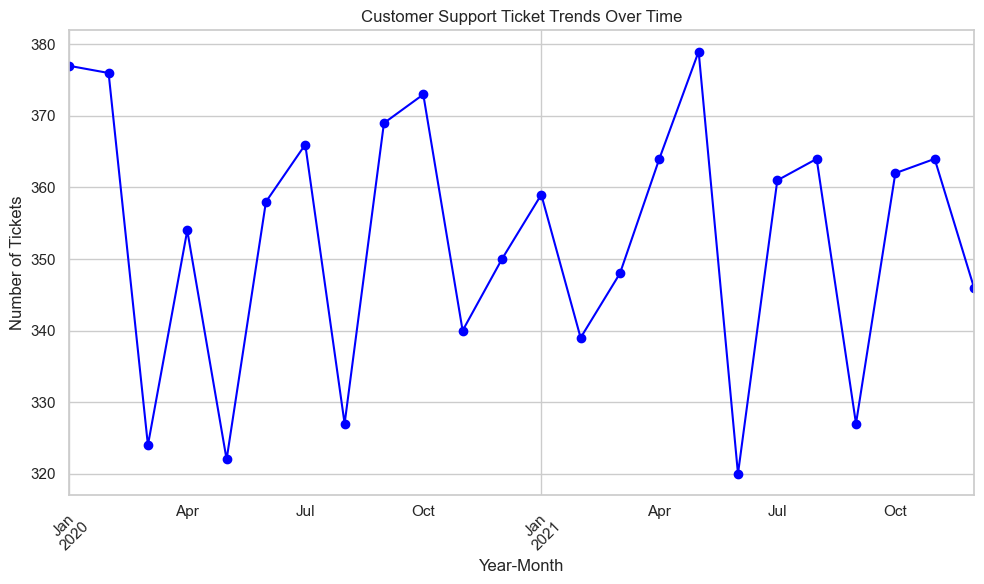

In [64]:
#Analyze customer support ticket trends
# Identify common issues
common_issues = dfv['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)
# Plotting ticket trends over time
dfv['Date of Purchase'] = pd.to_datetime(dfv['Date of Purchase'])
dfv['YearMonth'] = dfv['Date of Purchase'].dt.to_period('M')
ticket_trends = dfv.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o',color = "blue")
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

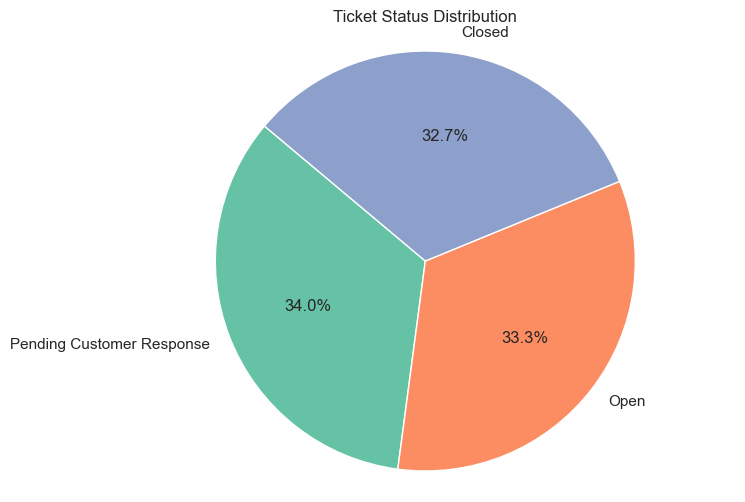

In [65]:
#Ticket Status Distribution
ticket_status_distribution = dfv['Ticket Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(ticket_status_distribution,
labels=ticket_status_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette("Set2"), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

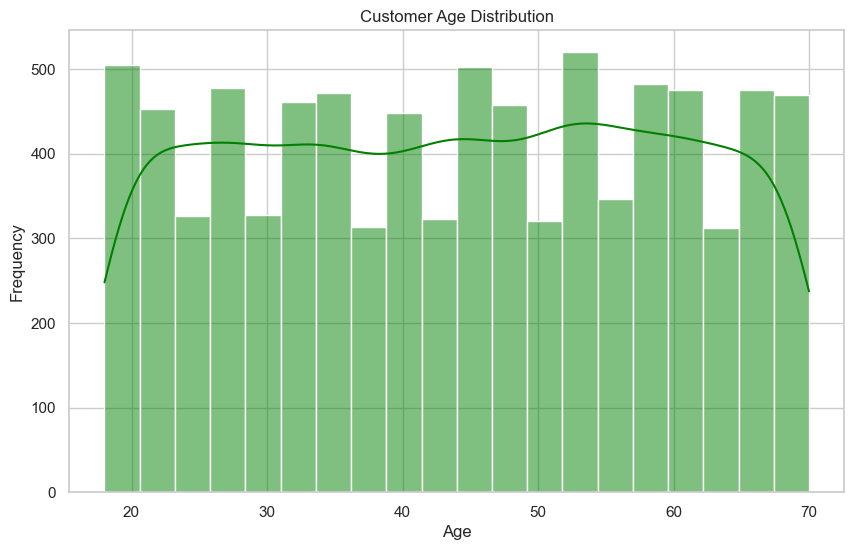

In [66]:
#Customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(dfv['Customer Age'], bins=20, kde=True,color='Green')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\sanit\AppData\Local\Temp\ipykernel_20524\2767527262.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_channel_distribution.index,


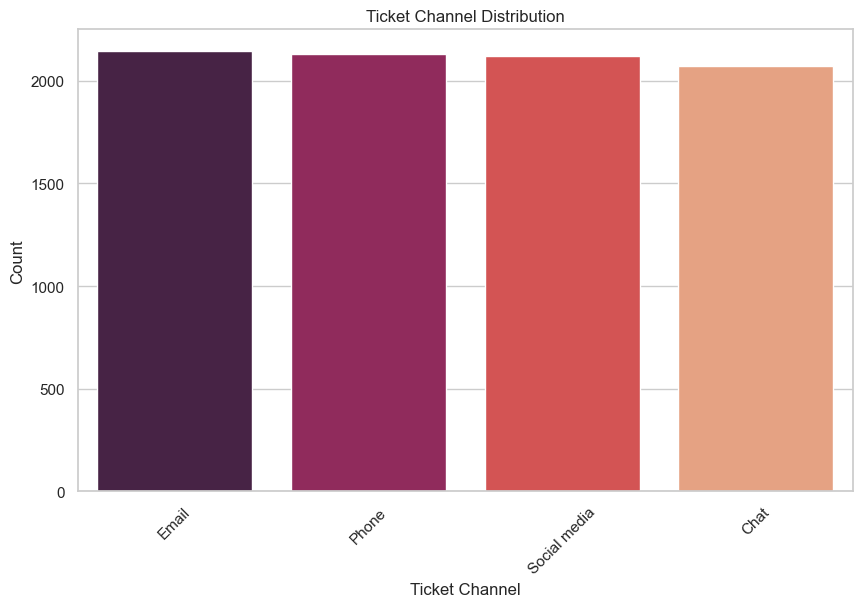

In [67]:
#Ticket Channel Distribution
plt.figure(figsize=(10, 6))
ticket_channel_distribution = dfv['Ticket Channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index,
y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Customer Gender', ylabel='Customer Satisfaction Rating'>

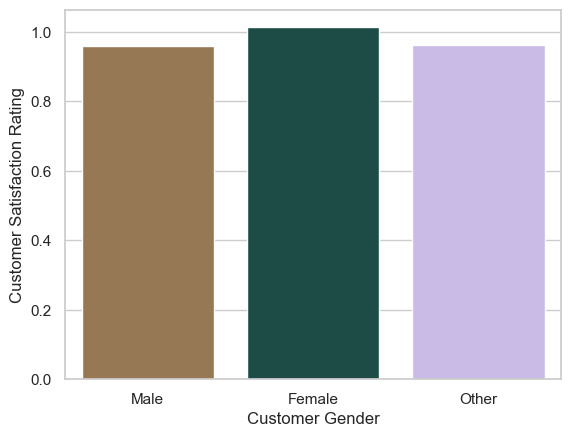

In [70]:
sns.barplot(
    x='Customer Gender',
    y='Customer Satisfaction Rating',
    hue='Customer Gender',
    data=average_satisfaction,
    palette='cubehelix',
    order=['Male', 'Female', 'Other'],
    legend=False
)


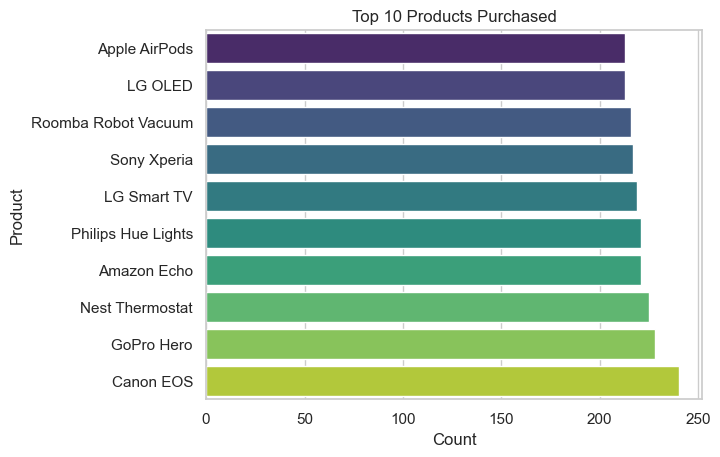

In [78]:
sns.barplot(
    y=product_purchased_distribution.index,
    x=product_purchased_distribution.values,
    hue=product_purchased_distribution.index,
    palette='viridis',
    legend=False
)

plt.title('Top 10 Products Purchased')  # This goes outside the sns.barplot()
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()


C:\Users\sanit\AppData\Local\Temp\ipykernel_20524\3334283898.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tickets_by_age_group = dfv.groupby('Age Group').size()


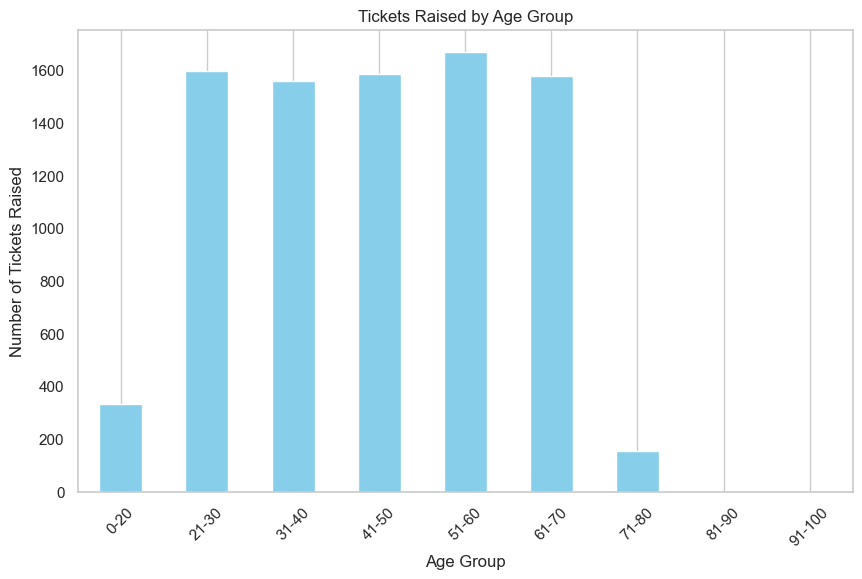

In [79]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80', '81-90', '91-100']
# Categorize customers into age groups
dfv['Age Group'] = pd.cut(dfv['Customer Age'], bins=bins,
labels=labels, right=False)
# Calculate number of tickets raised by each age group
tickets_by_age_group = dfv.groupby('Age Group').size()
# Plot
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [80]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [81]:
colname=[]
for column in data.columns:
    if data[column].dtype == "object":
        colname.append(column)
colname

['Customer Gender',
 'Product Purchased',
 'Date of Purchase',
 'Ticket Type',
 'Ticket Subject',
 'Ticket Description',
 'Ticket Status',
 'Resolution',
 'Ticket Priority',
 'Ticket Channel',
 'First Response Time',
 'Time to Resolution']

In [89]:
#Splitting the data in x and y
x = data.drop(columns = "Customer Satisfaction Rating",axis=1)
y = data["Customer Satisfaction Rating"]
# x= data.values[:,-3:-1]
# y= data.values[:,-1]

In [91]:
#using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [92]:
print(x_train.shape)
print(x_test.shape)

(5928, 13)
(2541, 13)


In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=42)

In [103]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values[:,[11,12]])
# X_scaled = scaler.fit_transform(df.values[:,[8,12]])

[2769.000000000001, 701.4622559930779, 319.0962952774373, 190.7672366440505, 140.21501891099004, 79.94434263915494, 59.87358578033911, 48.78173234198016, 41.60276258064408, 29.461056695626198]


Text(0, 0.5, 'wsse')

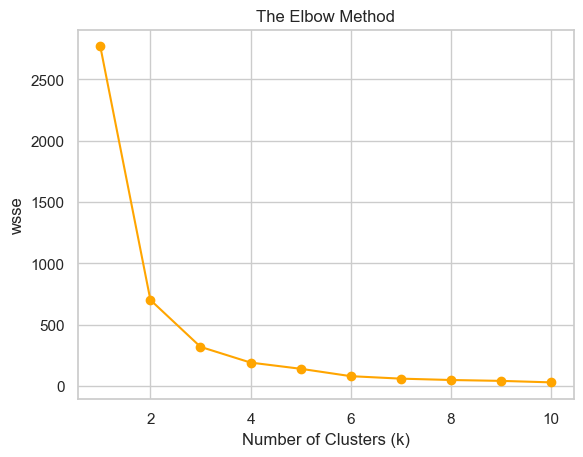

In [104]:
from sklearn.cluster import KMeans

wsse= []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i,random_state=10) 
    kmeans.fit(X_scaled)
    wsse.append(kmeans.inertia_) #wsse_ --> helps to find out squared sum error (wsse)
print(wsse)
plt.plot(range(1,11),wsse, marker='o',color="orange")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('wsse')

In [109]:
kmeans = KMeans(n_clusters=5,random_state=10)
Y_pred = kmeans.fit_predict(X_scaled)

In [110]:
df["clusters"] = Y_pred

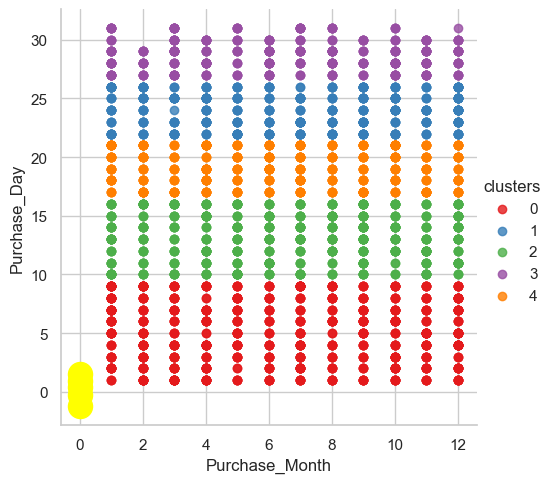

In [111]:
sns.lmplot(data=df, x=df.columns[-3], y=df.columns[-4], fit_reg=False, hue="clusters", palette="Set1")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,-1],s=300,c="yellow")
plt.show()